## K-Nearest Neighbours (KNN) 
- is a popular supervised learning algorithm used for classification tasks. It is a non-parametric method that classifies new instances based on the majority class of their nearest neighbors in the features spaces.
##### The KNN algorithm works as follows 
1. Choose the number of neighbors (k) to consider. This is typically an odd number to avoid ties in class voting.
2. For a new instance to be classified, calculate the distance(e.g Euclidean distance) between that instance and all other instances in the training dataset. 
3. Selecet the K instances with the shortest distance to the new instance. 
4. Determine the majority class among the K neighbours. This class becomes the predicted class for the new instance.

In [1]:
from sklearn.datasets import load_iris
import pandas as pd 

iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target

In [6]:
df['flower_name'] = df['target'].apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:150]

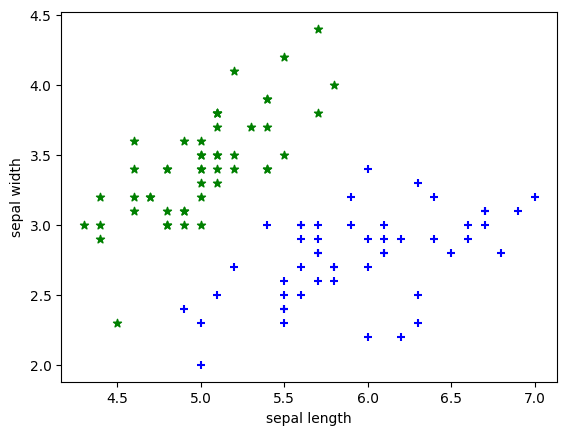

In [8]:
# sepal length vs sepal width (setosa vs versicolor)
import matplotlib.pyplot as plt 
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='*')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='blue', marker='+')


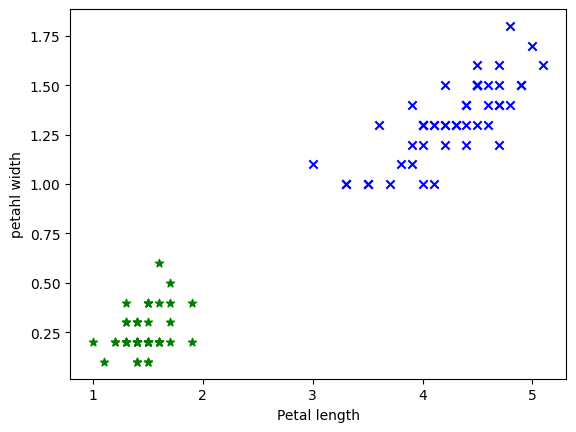

In [9]:
# petal length vs petal width (setosa vs versicolor)
plt.xlabel('Petal length')
plt.ylabel('petahl width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker='*')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='blue', marker='x')


In [10]:
# train test split 
from sklearn.model_selection import train_test_split
X = df.drop(['target', 'flower_name'], axis=1)
y = df.target


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [12]:
# create a knn classifier 
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [13]:
knn.score(X_test, y_test)

1.0

In [14]:
# plot the confusion matrix 
from sklearn.metrics import confusion_matrix
y_predicted = knn.predict(X_test)

In [15]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

Text(50.722222222222214, 0.5, 'Truth')

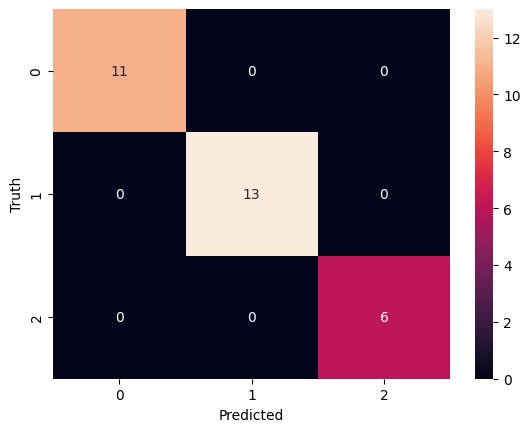

In [16]:
import seaborn as sns 
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [ ]:
# print the classification report for precession, 
from sklearn.metrics import classification_report

print(classification_report(y_test, y))